## Deber-Practica

Comparar el modelo de predicion matematico vs probabilidad.
- Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales. 
- Solo cargan los datos para generar los modelos menos 7 dias.

In [19]:
#Cargar Datos

from pylab import *  
import numpy as np
import pandas as pd
import sympy as sp

df = pd.read_csv('owid-covid-data.csv').fillna(0) # poniendo datos nan a cero
ndf= df.loc[(df['location'] == 'Ecuador') & (df['total_cases'] != 0)] # filtrando por pais y no ceros 
ndf1=ndf[['date','total_cases']]
x=np.arange(1,len(ndf1)+1,1, dtype='float') # arreglo de x lo creo para simular el numero del dia y el numero de casos
y=np.array(ndf1.values[:,1], dtype='float')

           4           3         2
1.357e-05 x - 0.01037 x + 3.666 x + 232.7 x - 3747


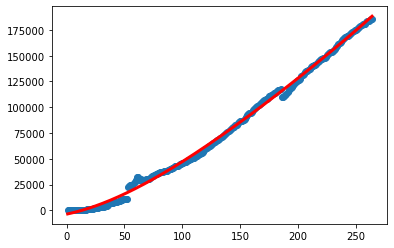

In [27]:

modelo_polinomial = np.poly1d(np.polyfit(x, y, 4))
print(fun_pol)
y_pred=fun_pol(x)
plt.scatter(x, y)
plt.plot(x, y_pred, c='red',lw=3)  
plt.show()

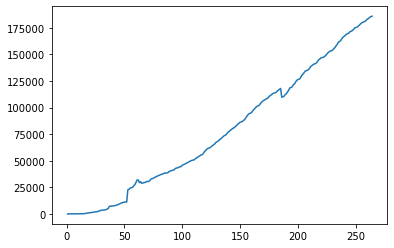

In [28]:
xp = x
yp = y

df_p = pd.read_csv('owid-covid-data.csv').fillna(0) # poniendo datos nan a cero
df1_p= df_p.loc[(df_p['location'] == 'Ecuador') & (df_p['total_cases'] != 0)]
df2_p=df1_p[['date','total_cases']]
media = df2_p.values[:,1].mean()
mediana = np.median(df2_p.values[:,1])
# Quiero predecir cuántos "Casos" voy a obtener de aqui a menos 7 dias.
for i in range(int(xp[-1]), int(xp[-1])):
    xp=np.append(xp,(i+1))
    yp=np.append(yp,yp[-1] + mediana)
#valorProbabilistico=y[319]
plt.plot(xp, yp)
plt.show()

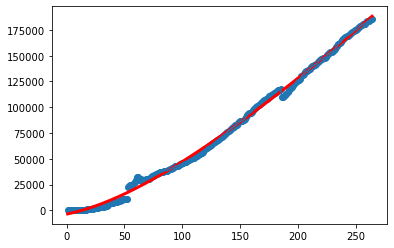

In [25]:
plt.scatter(x, y)
plt.plot(x, y_pred, c='red',lw=3)
for i in range(int(xp[-1]), int(xp[-1])):
    xp=np.append(xp,(i+1))
    yp=np.append(yp,yp[-1] + mediana)
valorProbabilistico=yp[234]
plt.plot(xp[61:], yp[61:])
plt.show()

In [32]:
xp_7 = xp
yp_7 = yp

for i in range(int(xp_7[-1]), int(xp_7[-1]-7)):
    xp_7=np.append(xp_7,(i+1))
    yp_7=np.append(yp_7,yp_7[-1] + mediana)
inicio = len(xp_7)-10
fin=len(xp_7)
print("PROBABILISTICO","      ","POLINOMIAL")
for i in range(inicio,fin):
    print(y_pred[i],"      ",round(yp_7[i],2),)
    dinin=y_pred[i]
    dfi=yp_7[i]
    real=y[i]
print("Datos Hace 7 dias: ",dinin,"      ",round(dfi,2),"      ",real)

PROBABILISTICO        POLINOMIAL
179359.52722769324        179627.0
180339.58305931234        180295.0
181321.7106701876        180676.0
182305.9313513606        181104.0
183292.26671944736        182250.0
184280.73871663824        183246.0
185271.36961069805        183840.0
186264.18199496597        184876.0
187259.19878835563        185643.0
188256.443235355        185944.0
Datos Hace 7 dias:  188256.443235355        185944.0        185944.0


Conclusión :

El muestreo probabilístico es un método de muestreo (muestreo se refiere al estudio o el análisis de grupos pequeños de una población) que utiliza formas de métodos de selección aleatoria. ... Por ejemplo, si tienes una población de 100 personas, cada persona tendría una probabilidad de 1 de 100 de ser seleccionado.

Modelo polinomial Es una forma de regresión lineal en el que la relación entre la variable independiente x y la variable dependiente Y se modela como un polinomio